<a href="https://colab.research.google.com/github/DAVOR2003/ADA/blob/main/informe8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-Descripción del problema

Entrada: Secuencia ordenada de n claves: K=\left. En el que cada clave 
 o "clave real" tiene una probabilidad 
 de ser buscada. Existen "claves ficticas" 
 que representan las búsquedas fallidas, de la forma 
. Cada clave 
 tiene una probabilidad 
 de ser buscada.

Salida: Árbol binaro de búsqueda óptimo, de manera que minimice la cantidad esperada de nodos visitados (costo esperado).

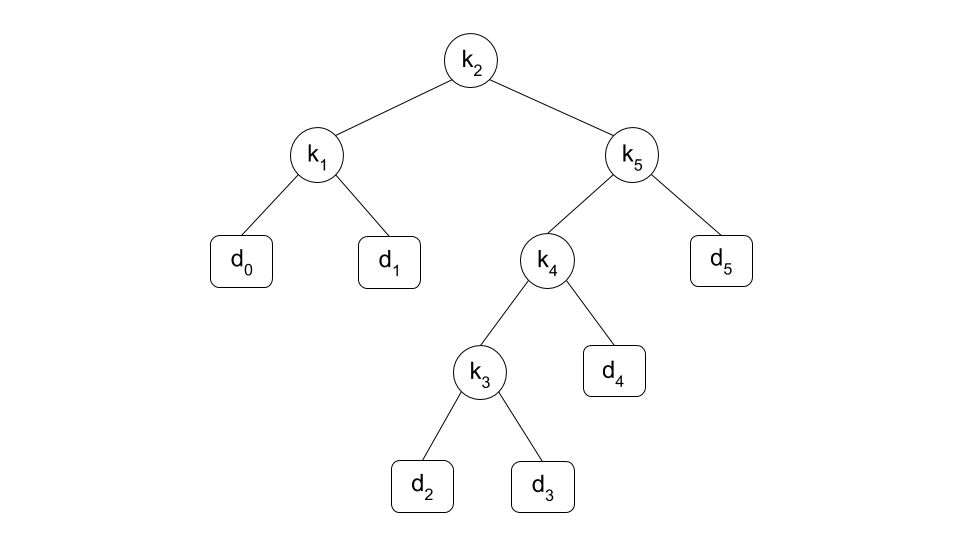

#2-Descripcion del algoritmo


Antes de describir cada algoritmo, debemos saber que cada árbol binario de búsqueda óptimo se compone de los siguientes elementos:

* Un arreglo de elementos $K:<K_1,K_2,...,K_n>$, donde cada elemento $K_i$ corresponde a un nodo padre que esta entre $1 \leq i \leq n$

* Un arreglo de elementos $p:<p_1,p_2,...,p_n>$. Cada elemento $p_i$ es la probabilidad asociada a $K_i$ de ser buscada.

* Un arreglo de elementos $d:<d_1,d_2,...,d$<sub>n+1</sub>>, sus elementos corresponden a las claves ficticias o mejor dicho los nodos hojas del árbol y representan las búsquedas fallidas, estas se mueven en $K$<sub>$i-1$</sub>$\leq$$d_i$$\leq$$K_i$

También debemos considerar como se construye los árboles binarios a partir de un arreglo:

* Sea un arreglo $A=[x_1,x_2,...,x_n]$, se puede construir un árbol escogiendo un nodo $x_i$ que será la raiz y separando el arreglo $A$ en: $A_1=[x_1,...,$x<sub>i-1</sub>] $;$ $A_2=[$x<sub>i+1</sub>$,...,x_n]$. Siguiendo estos mismos pasos con los sub-arreglos se puede construir un árbol hasta que sea un único elemento del arreglo.

El algoritmo recursivo posee una subestructura óptima, la cual dice que si podemos construir un árbol binario de búsqueda óptimo $T$, significa que un sub-árbol $T'$ con claves $K = [ki ....kj]$ debe ser óptimo (minimice los costos de recorrer el árbol). Si no fuera así y hubiera otro sub-árbol $T''$ que minimice los costos mejor que $T'$ se contradice la optimización de este sub-árbol, en ese caso, solo se debe remplazar el sub-árbol, por lo cual, ahora si el árbol $T$ pasara a ser óptimo.

Al saber lo anterior, podemos decir que se puede construir una solución óptima a partir de soluciones óptimas, para la clave $k_r$ donde $i \leq r \leq j$, se puede escoger un $k_r$ que será la raiz de un sub-árbol óptimo, en esta separación, podemos contruir otros sub-árboles desde $[k_i...$k<sub>r-1</sub>$]$ y $[$k<sub>r-1</sub>$,...k_j]$. Al momento de analizar los posibles candidatos $k_r$ se iran verificando y construyendo todos los sub-árboles óptimos izquierdo y derechos al nodo $k_r$, como esto verifica cada combinación posible, se puede garantizar la construcción de un árbol binario de búsqueda óptimo. Además debemos considerar si en algún momento nos da alguna combinación $k_x$ que pertenezca $k_x,...,$k<sub>x-1</sub> significa que no hay solución que se encuentre en el arreglo $K$ y por tanto es una solución ficticia perteneciente a $d$.


###2.1 Algoritmo recursivo

Pasos a seguir:

* Al escoger un valor $k_r$ perteneciente a $i \leq r \leq j$ se llama a la función de forma recursiva y se les da los sub-arreglos generados por la partición en $k_r$

* Se calcula el costo esperado entre i y j.

* Si j es igual a i, no existen claves reales, por lo que, se retorna la clave ficticia $d$<sub>i-1</sub>.


Para calcular el costo esperado se define como:

* Costo_esperado[i,j] = min(Costo_esperado[i,r-1] + Costo_esperado[r+1,j] + Sumatoria_de_probabilidad(i,j))

* Sumatoria_de_probabilidad =  $\displaystyle\sum_{l=i}^{j}p_l + \displaystyle\sum_{l=i-1}^{j}q_l $

* Si hay una clave ficticia el coste esperado es la probabilidad de la clave ficticia.



###2.2 Algoritmo con solución Bottom-Up

Teniendo en cuenta que aplicar un algoritmo recursivo puede tener costes muy altos, se puede proponer una solución más eficiente ocupando matrices. Esta realiza los siguientes pasos:

* Se debe almacenar los valores para calcular el costo esperado en una matriz de $n+1$ filas y $n$ columnas. Por tanto, se crea dicha matriz $e$. La razón del valor $n+1$ consiste en que debemos almacenar las claves ficticias $d_n$.

* Se debe crear otra matriz $root$ para almacenar los valores de las claves $k_i$ que van de $[0...n]$

* Por último, para almacenar los valores de w(i,j) y no tener que calcularlos de nuevo, se crea una matriz $w$ para guardar los valores del costo esperado.



#Codigo

In [1]:
import math
def matprint(mat, fmt="g"):
  col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
  for x in mat:
      for i, y in enumerate(x):
          print(("{:"+str(math.trunc(col_maxes[i]))+fmt+"}").format(y), end="  ")
      print("")

Recursivo

In [2]:
import math
from termcolor import colored

# Encuentra el costo óptimo
def optCost(p, q, i, j, cont, verbose = False):
  
  # Contador de llamadas recursivas
  cont[0] += 1

  # caso base
  if j < i: 
    return q[i - 1]
    
  # Se obtiene la suma se las frecuencias/probabilidades desde i hasta j
  s = sum(p[i - 1:j]) + sum(q[i - 1:j+1])

  # Se inicializa en un valor máximo para la primera comprobación
  m = math.inf
    
  for r in range(i, j + 1):
    # La el costo  del subárbol es la suma del izquierdo, el derecho y la suma de probabilidades
    cost = (optCost(p, q, i, r - 1, cont, verbose) + optCost(p, q, r + 1, j, cont, verbose) + s)
  
    if (verbose == True):
      print("La suma de las probabilidades es: ", colored(round(s, 2), 'blue'))
      print(f"El costo del arbol de raiz {r} es: {colored(round(cost, 2), 'green')}")
    # Si el costo obtenido es menor se actualiza
    if cost < m:
      if (verbose == True):
        print(f"El costo del arbol {round(cost,2)} < {round(m,2)}, se actualiza el costo optimo")
        print("El costo optimo es:", colored(round(cost, 2), 'magenta'))
        print("\n")
      m = cost
    else:
      if (verbose == True):
        print(f"El costo del arbol {round(cost,2)} >= {round(m,2)}, se mantiene el costo optimo")
        print("El costo optimo es:", colored(round(m, 2), 'magenta'))
        print("\n")

  # Retorna el valor minimo mas la suma de probabilidades
  return m

def recursiveOBST(p, q, n, cont, verbose = False):
  c = optCost(p, q, 1, n, cont, verbose)
  if verbose == True:
    print("El costo óptimo es: ", colored(round(c, 2), 'red'))
  return c

cont = [0]
k = [1, 2, 3, 4, 5, 6, 7]
p = [0.04, 0.06, 0.08, 0.02, 0.10, 0.12, 0.14]
q = [0.06, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05]
n = len(k)

print("EL costo óptimo es:", recursiveOBST(p, q, len(k), cont))
print("Cantidad de llamadas recursivas:", cont[0])

EL costo óptimo es: 3.12
Cantidad de llamadas recursivas: 2187


Dinamico

In [3]:
import math
import numpy as np

# Árbol óptimo dinámico.
# p es la probabilidad de las claves reales
# q son las claves ficticias (dummy)
# n es el largo del arreglo
# cont es el contador de subproblemas

def dynamicBst(p, q, n, cont, verbose = False): 
  # subarbol óptimo
  e = np.zeros((n+2, n+1))

  # suma de probabilidades
  w = np.zeros(shape=(n+2,n+1))

  # se utiliza para construir el árbol
  root = np.zeros((n+1, n+1), dtype = int)

  # Se almacenan las probabilidades
  for i in range(1, n+2):
    e[i][i-1] = q[i-1]
    w[i][i-1] = q[i-1]
      
  for l in range(1, n + 1):
    for i in range(1, n - l + 2):
      # Aumenta el contador de subproblemas
      cont[0] += 1
      j = i + l - 1
      # Se le asigna un número grande para la primera comparación
      e[i][j]= math.inf
      # Suma de probabilidades
      w[i][j] = w[i][j-1] + p[j - 1] + q[j]
      if (verbose == True):
        print(f"Calculando datos para el subarbol {colored(i, 'green')}...{colored(j, 'green')}: ")
      if verbose == True:
        print(f"La suma de probabilidades de w[{i}][{j}] es: {colored(round(w[i][j], 2), 'green')}")
      
      for k in range (i, j + 1):
        # El costo óptimo para la raiz k
        t = e[i][k-1] + e[k + 1][j] + w[i][j]
        # Si este es menor
        if (t < e[i][j]):
          e[i][j] = t
          root[i][j] = k
      if (verbose == True):
        print(f"El costo mínimo del arbol de raiz e[{i}][{j}] es: {colored(round(e[i][j], 2), 'magenta')}\n")

  if (verbose == True):
    print("El costo mínimo del arbol es:",colored(round(e[1][n], 2), 'blue'))
    print("La matriz de costos w es: ")
    print(np.array2string(e, formatter={'float_kind': '{0:.2f}'.format}))
    print("\nLa matriz de probabilidades e es: ")
    print(np.array2string(w, formatter={'float_kind': '{0:.2f}'.format}))

  return (e[1][n], root)

k = [1, 2, 3, 4, 5]
p = [0.15, 0.10, 0.05, 0.10, 0.20]
q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
n = len(k)
cont = [0]
q, root = dynamicBst(p, q, n, cont)
print("Costo mínimo:", q)
print("Cantidad de subproblemas resueltos:", cont[0])

#tree = construct_optimal_bst(root, k, 1, n)

Costo mínimo: 2.75
Cantidad de subproblemas resueltos: 15


#Ejemplo:

###2.2.3 Ejemplo

Considere una secuencia de $n=3$ claves.

$keys = [10, 12, 20]$

Cuya tabla de probabilidades por clave es la siguiente:

$p = [34, 8, 50]$

Primero, creamos una matriz `cost` de dimensiones `n x n`, en este caso `3 x 3`, que nos ayudará a almacenar los costes mínimos de cada subproblema resuelto. Iniciamos todas sus posiciones en 0 a excepción de la diagonal $cost_{0,0} , cost_{1,1} ... , cost_{n-1,n-1}$, la cual poseerá las probabilidades de cada clave de ser buscada.

$cost = \begin{equation}
\begin{pmatrix}
34 & 0 & 0\\
0 & 8 & 0\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

Ahora, partimos con nuestro primer valor de `L` largo de matriz, el cual irá desde `2` hasta `n = 3`, y por cada caso iremos recorriendo las filas con el índice `i`, que irá desde `0` a `n - L + 2 = 3` y conseguimos el valor del índice de columnas `j` en cada caso.

$L = 2$

$--> i = 0$

$----> j = i + L - 1 = 1$

Ahora, como $i$ ni $j$ son mayores o iguales a $n$, se procede a obtener la suma de probabilidades desde `i` hasta `j` en el arreglo de probabilidades. Además, inicializamos el valor de la posición `cost[i][j]` como un valor marginalmente grande como un coste mínimo inicial.

$sumatoria = 34 + 8 = 42$

$cost[i][j] = 2147483647$

Ahora, por cada valor de `r` desde `i` hasta `j`, tendremos un valor `c` el cual tomará la suma entre `sumatoria` y:

* Si `r` es mayor a `i`, la posición `cost[i][r-1]`.

* Si `r` es menor a `j`, la posición `cost[r+1][j]`

Como actualmente `r` cumple sólo el segundo caso, se hace la suma pertinente.

$r = 0 :$

$c = sumatoria + cost[1][1] = 42 + 8 = 50$

Como el valor total de la suma es menor al ya encontrado en `cost[i][j] = cost[0][1]`, actualizamos la posición al nuevo valor mínimo.

$cost = \begin{equation}
\begin{pmatrix}
34 & 50 & 0\\
0 & 8 & 0\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

Realizamos el mismo procedimiento con el siguiente valor de `r`:

$r = 1; $
$r > i$

$c = sumatoria + cost[0][0] = 42 + 34 = 76$

$min(c,cost[0][1]) = cost[0][1] ; cost[0][1] = 50$

$cost = \begin{equation}
\begin{pmatrix}
34 & 50 & 0\\
0 & 8 & 0\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

Una vez terminado con el ciclo de `r`, ya hemos encontrado el coste mínimo de este subproblema.
Ahora pasamos al siguiente valor de `i`.

$L = 2$

$--> i = 1$

$----> j = i + L - 1 = 2$

$sumatoria = 8 + 50 = 58$

$cost[i][j] = 2147483647$

Para cada `r` desde `i` hasta `j`:

$r = 1; $
$r < j$

$c = sumatoria + cost[2][2] = 58 + 50 = 108$

$min(c,cost[1][2]) = sumatoria ; cost[1][2] = 108$

$cost = \begin{equation}
\begin{pmatrix}
34 & 50 & 0\\
0 & 8 & 108\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

$r = 2; r > i$

$c = sumatoria + cost[1][1] = 58 + 8 = 66$

$min(c,cost[1][2]) = c; cost[1][2] = 66$

$cost = \begin{equation}
\begin{pmatrix}
34 & 50 & 0\\
0 & 8 & 66\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

Para el siguiente valor `i = 2`, al ver que el cálculo de `j` nos daría `j = i + L - 1 = 3 = n`, el índice de las columnas se sale del rango de la matriz, por lo que no se puede trabajar con este subproblema y se omite. Lo mismo se puede decir para `i = 3 = n` donde `j = i + L - 1 = 4 > n`.

Realizamos este procedimiento para todo valor de `L` dentro de su rango:

$L = 3$

$--> i = 0$ (Desde 0 hasta n - L + 2 = 2)

$---> j = i + L - 1 = 2

$sumatoria = 34 + 8 + 50 = 92$

$cost[i][j] = 2147483647$

$r = 0; $
$r < j$

$c = sumatoria + cost[1][2] = 92 + 66 = 158$

$min(c,cost[0][2]) = c ; cost[0][2] = 158$

$cost = \begin{equation}
\begin{pmatrix}
34 & 50 & 158\\
0 & 8 & 66\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

$r = 1; $
$r < j; r > 1$

$c = sumatoria + cost[0][0] + cost[2][2] = 92 + 34 + 50 = 176$

$min(c,cost[0][2]) = cost[0][2] ; cost[0][2] = 158$

$cost = \begin{equation}
\begin{pmatrix}
34 & 50 & 158\\
0 & 8 & 66\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

$r = 2; $
$r > i$

$c = sumatoria + cost[0][1] = 92 + 50 = 142$

$min(c,cost[0][2]) = cost[0][2] ; cost[0][2] = 142$

$cost = \begin{equation}
\begin{pmatrix}
34 & 50 & 142\\
0 & 8 & 66\\
0 & 0 & 50
\end{pmatrix}
\end{equation} $

Nuevamente, para los siguientes valores de `i` se obtendrá un valor para `j` mayor o igual a `n`, por lo que aquellos ciclos se descartan.

Ahora que hemos terminado con el ciclo de valores para `L`, retornamos el valor en la matriz ubicado en la posición `[0][n-1]`, es decir, retornamos `cost[0][2]` = 142.

Tenemos finalmente, el costo del árbol binario de búsqueda óptimo para nuestro caso.



#Paso a paso (verbose = true)

In [4]:
import random
def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = list(arr[n:]) # Probabilidad de las claves ficticias
    return keys, p, q

Recursivo

In [5]:
k, p, q  = optimal_bst_instance_generator(4)
print("Claves: ", k)
print("Probabilidades: ", np.around(p,2))
print("probabilidades ficticias: ", np.around(q,2))
print("\n")
c = recursiveOBST(p, q, len(k), cont, verbose = True)

Claves:  [10, 29, 36, 91]
Probabilidades:  [0.11 0.14 0.02 0.09]
probabilidades ficticias:  [0.1  0.21 0.1  0.13 0.11]


La suma de las probabilidades es:  0.32
El costo del arbol de raiz 4 es: 0.56
El costo del arbol 0.56 < inf, se actualiza el costo optimo
El costo optimo es: 0.56


La suma de las probabilidades es:  0.44
El costo del arbol de raiz 3 es: 1.11
El costo del arbol 1.11 < inf, se actualiza el costo optimo
El costo optimo es: 1.11


La suma de las probabilidades es:  0.25
El costo del arbol de raiz 3 es: 0.48
El costo del arbol 0.48 < inf, se actualiza el costo optimo
El costo optimo es: 0.48


La suma de las probabilidades es:  0.44
El costo del arbol de raiz 4 es: 1.03
El costo del arbol 1.03 < 1.11, se actualiza el costo optimo
El costo optimo es: 1.03


La suma de las probabilidades es:  0.79
El costo del arbol de raiz 2 es: 2.03
El costo del arbol 2.03 < inf, se actualiza el costo optimo
El costo optimo es: 2.03


La suma de las probabilidades es:  0.45
El costo del 

Dinamico

In [6]:
k, p, q  = optimal_bst_instance_generator(5)
cont = [0]
q = dynamicBst(p, q, len(k), cont, verbose = True)

Calculando datos para el subarbol 1...1: 
La suma de probabilidades de w[1][1] es: 0.27
El costo mínimo del arbol de raiz e[1][1] es: 0.44

Calculando datos para el subarbol 2...2: 
La suma de probabilidades de w[2][2] es: 0.24
El costo mínimo del arbol de raiz e[2][2] es: 0.37

Calculando datos para el subarbol 3...3: 
La suma de probabilidades de w[3][3] es: 0.21
El costo mínimo del arbol de raiz e[3][3] es: 0.39

Calculando datos para el subarbol 4...4: 
La suma de probabilidades de w[4][4] es: 0.4
El costo mínimo del arbol de raiz e[4][4] es: 0.64

Calculando datos para el subarbol 5...5: 
La suma de probabilidades de w[5][5] es: 0.25
El costo mínimo del arbol de raiz e[5][5] es: 0.39

Calculando datos para el subarbol 1...2: 
La suma de probabilidades de w[1][2] es: 0.42
El costo mínimo del arbol de raiz e[1][2] es: 0.86

Calculando datos para el subarbol 2...3: 
La suma de probabilidades de w[2][3] es: 0.41
El costo mínimo del arbol de raiz e[2][3] es: 0.89

Calculando datos para

#3-Tiempo de ejecución

**Recursivo**

En el caso del algoritmo recursivo, considera cada recursión como un sub-problema distinto. Esta versión calcula el costo utilizando la subestructura óptima, generando dos recursiones por cálculo, pero al iterar más a fondo, la cantidad de sub-problemas crece según la raíz seleccionada durante el ciclo for inicial.

Se puede observar mejor considerando la representación de la subestructura óptima vista en la correctitud.


Es posible establecer una ecuación de recurrencia para este algoritmo considerando la forma en que trabaja los sub-problemas.

- Tomando en cuenta que la cantidad de sub-problemas crece en función de la clave raíz, se puede determinar que:

  $T(n) = \displaystyle\sum_{i = 0}^{n-1} T(i)$

- Ahora considerando la otra expresión vista para la subestructura óptima (representada en el código):

  $C[i,j] = \min\limits_{i\leq k \leq j}(C[i, k-1] + C[k,j] + w(i,j))$

  - Se infiere que el tiempo de ejecución para $w(i,j)$ es de O(n). Por lo que:

   $T(n) = \displaystyle\sum_{i = 0}^{n-1} T(i) + n $

  - Desarrollando la expresión queda:
   
   $T(n) = T(n-1) + T(n-2) + T(n-3) ... + T(0) + n $

  - Reduciendo los valores a una expresión conocida $(Fibonacci = F(n) = F(n-1) + F(n-2))$:

   $F(n-1) + F(n-2) \leq T(n-1) + T(n-2) + T(n-3) ... + T(0) + n $
   
   $T(n) \geq T(n-1) + T(n-2)$

   $T(n) \geq 2^n $

El tiempo de ejecución del algoritmo recursivo es de $O(2^n)$

**Dinamico**

Definir la cantidad de sub-problemas:

En el algoritmo dinámico, se utiliza memoria extra para guardar las soluciones de los sub-problemas resueltos, de forma que el programa utilice esta información si se vuelve a topar con algún sub-problema repetido.

Cómo se aprecia en el código, los sub-problemas se almacenan en una matriz. Esto se debe a que estos depende de los índices iniciales y finales que tomarán para análizar el sub-problema. $i$ pasa a ser la clave más baja a utilizar, mientras que $j$ será la más alta. De esta forma se generan distintos rangos.

- Considerando que los índices varían en un rango propio, y que k será la cantidad de raíces (sub-problemas) a evaluar, se tiene que:

  - $S(n) = \displaystyle\sum_{i = 1}^{n} \displaystyle\sum_{j = 0}^{n-1}$ $k$<sub>$ij$</sub>
  - $S(n)$ = cantidad de sub-problemas.

- Tomando en cuenta que ambas sumatorias realizan $n$ pasos, se reduce la expresión a la siguiente:
  - $S(n) = O(n^2)$

Con lo anterior, es posible definir que el algoritmo resuelve $O(n^2)$ sub-problemas.

Para evaluar el tiempo de ejecución, es necesario obtener la complejidad de cada sub-problema. Los $O(n^2)$ sub-problemas, de forma general, se resuelven mediante la fórmula de la subestructura óptima.

- Teniendo la fórmula:
  - $C[i,j] = \min\limits_{i\leq k \leq j}(C[i, k-1] + C[k,j] + w(i,j))$
- Sabiendo que w(i,j) se calcula como:
  - $w(i,j) = \displaystyle\sum_{l = i}^{n} p_i + \displaystyle\sum_{l = i-1}^{n} q_i = O(n)$
- Y considerando que los costos anteriores ya fueron calculados, se obtiene que:
  - $C[i,j] = O(1) + O(1) + O(n)$
  - $C[i,j] = O(n)$

Cada sub-problema se calcula en un tiempo de O(n). Lo que deriva en la siguiente fórmula:

- $T(n) = O(n^2) * O(n)$. ---> Cantidad de sub-problemas X tiempo de ejecución individual.
- $T(n) = O(n^3)$

Esto da un tiempo de ejecución para el algoritmo de $O(n^3)$. Esto toma validez si se analiza el código, donde se realizan tres ciclos for anidados que tienen rangos $O(n)$.

No obstante, si se considera una matriz que guarde todos los datos de "$w(i,j)$", y se modifica el algoritmo en función de que cumpla únicamente con los valores de la subestructura óptima que representen una raíz válida entre los rangos determinados, es posible reducir el tiempo de ejecución.


#4-Correctitud

$Teorema:$ *El algoritmo resuelto mediante Bottom-up retorna el costo mínimo de un árbol binario de búsqueda óptimo*

Dados tres arreglos, uno de claves $(keys)$ de tamaño $n$, probabilidades de las claves $(p)$ de tamaño $n$ y probabilidades ficticias $(q)$ de tamaño $n+1$, podemos probar por inducción y la lógica que ejerce Bottom-up en este problema, que el algoritmo minimiza el recorrido de un árbol por sus nodos.

Sea $P(1)$ el caso base, correspondiente a un nodo hoja del árbol y esos nodos son las claves ficticias que tienen una probabilidades dadas en el arreglo $q$. Como dichas claves son inexistente, pero se pueden representar por su probabilidad, podemos decir, que dichas probabilidades son equivalentes a los casos bases para empezar a construir el valor óptimo. En consecuencia, a ser valores únicos, también son la subestructura óptima base para obtener el valor óptimo, obteniendo que para dicha subestructura su coste esperado o valor óptimo es correcto.


Sea $P(m)$ con $m < n$ un subproblema o sub-árbol del problema original, podemos decir que estos subproblemas tienen un coste mínimo gracias a la estrategia Bottom-up, debido a que ya teniendo los problemas bases que son las claves ficticias, se pueden ir armando los sub-árboles de abajo hacia arriba y no se necesita descomponer el árbol desde una clave $k_i$ para obtener sus valores base y volver a armar el árbol calculando el coste. Como dichos valores de los subproblemas se van almacenando en estructuras auxiliares, no debemos volver a calcular los valores para valores que ya fueron obtenidos en otras ocasiones como en el caso recursivo. En conclusión, podemos decir que el algoritmo retorna el valor óptimo para un árbol que se puede construir a partir de un arreglo $k$.


#5-Experimentos

Recursivo vs Dinamico

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
  
x=[]; y=[]
y1=[]
for n in range(5,14):

  k,p,q  = optimal_bst_instance_generator(n)
  cont = [0]

  t1 = repeat(setup="from __main__ import recursiveOBST", stmt=f"recursiveOBST({p}, {q}, {n}, {cont})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import dynamicBst", stmt=f"dynamicBst({p}, {q}, {n}, {cont})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Recursivo", "Dinámico"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

Lo primero que podemos notar es la eficiencia que posee la implementación dinámica a comparación de la recursiva, esto debido al tiempo de ejecución exponencial que posee la implementación recursiva $O(3^n)$, la cual es mucho mayor a la complejidad dinámica $O(n^3)$ que crece de manera polinomial.